# Lab 7: Heart Attack 

## The Data

* Read in data
* Clean data
* Summarize data

In [3]:
import pandas as pd 
health = pd.read_csv(r"C:\Users\achur\OneDrive\Desktop\School\CP Fall 2024\544\GSB-544-2\heart_attack.csv")
health.describe()

,age,sex,cp,trtbps,chol,restecg,thalach,output
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,54.347985,0.673993,0.974359,132.098901,246.860806,0.538462,149.446886,0.534799
std,9.163134,0.469611,1.030456,17.700358,52.569726,0.528059,23.240707,0.499704
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,133.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,1.000000,152.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,1.000000,166.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,2.000000,202.000000,1.000000


## Part One: Fitting Models

This section asks you to create a final best model for each of the model types studied this week. For each, you should:

Find the best model based on ROC AUC for predicting the target variable.

Report the (cross-validated!) ROC AUC metric.

Fit the final model.

Output a confusion matrix; that is, the counts of how many observations fell into each predicted class for each true class.

(Where applicable) Interpret the coefficients and/or estimates produced by the model fit.

You should certainly try multiple model pipelines to find the best model. You do not need to include the output for every attempted model, but you should describe all of the models explored. You should include any hyperparameter tuning steps in your writeup as well.

Q1: KNN
Q2: Logistic Regression
Q3: Decision Tree
Q4: Interpretation
Which predictors were most important to predicting heart attack risk?

Q5: ROC Curve
Plot the ROC Curve for your three models above.

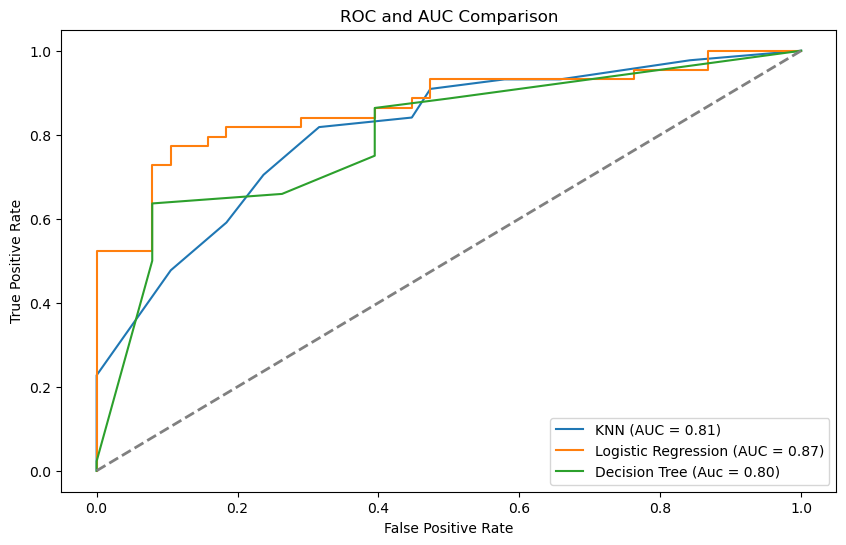


Logistic Regression Important Coefficients:
   Feature  Coefficient
6  thalach     1.093711
1      sex    -0.942313
2       cp     0.801538
3   trtbps    -0.446128
0      age    -0.212930
4     chol    -0.200523
5  restecg     0.088951

Decision Tree Important Coefficients:
   Feature  Importance
2       cp    0.430304
6  thalach    0.227736
0      age    0.191229
1      sex    0.084225
3   trtbps    0.066506
4     chol    0.000000
5  restecg    0.000000


Logistic Regression Important Coefficients:
   Feature  Coefficient
6  thalach     1.093711
1      sex    -0.942313
2       cp     0.801538
3   trtbps    -0.446128
0      age    -0.212930
4     chol    -0.200523
5  restecg     0.088951

Decision Tree Important Coefficients:
   Feature  Importance
2       cp    0.430304
6  thalach    0.227736
0      age    0.191229
1      sex    0.084225
3   trtbps    0.066506
4     chol    0.000000
5  restecg    0.000000


In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# variables
X = health.drop("output", axis =1)
y = health["output"]

# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1, stratify = y)

# knn model with hyperparameter tuning
knn = KNeighborsClassifier()
param_grid_knn = {"n_neighbors": range(1, 31)}
grid_knn = GridSearchCV(knn, param_grid_knn, cv = 5, scoring = "roc_auc")
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
best_knn.fit(X_train, y_train)
y_proba_knn = best_knn.predict_proba(X_test)[:,1]
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)

# logistic regression model with hyperparameter tuning
log_reg = LogisticRegression(max_iter=1000, random_state=1)
param_grid_lr = {"C": [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(log_reg, param_grid_lr, cv = 5, scoring = "roc_auc")
grid_lr.fit(X_train, y_train)
best_log_reg = grid_lr.best_estimator_
best_log_reg.fit(X_train, y_train)
y_proba_lr = best_log_reg.predict_proba(X_test)[:,1]
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

# decision tree with hyperparamter tuning
dtree = DecisionTreeClassifier(random_state=1)
param_grid_dt = {"max_depth": range(1, 11)}
grid_dt = GridSearchCV(dtree, param_grid_dt, cv = 5, scoring = "roc_auc")
grid_dt.fit(X_train, y_train)
best_dtree = grid_dt.best_estimator_
best_dtree.fit(X_train, y_train)
y_proba_dt = best_dtree.predict_proba(X_test)[:,1]
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

# plotting roc curves
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, label = f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot(fpr_lr, tpr_lr, label = f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, label = f"Decision Tree (Auc = {roc_auc_dt:.2f})")
plt.plot([0,1], [0,1], color = "gray", lw = 2, linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC and AUC Comparison")
plt.legend(loc="lower right")
plt.show()

# coefficients for logistic regression
coefficients_lr = best_log_reg.coef_[0]
feature_importance_lr = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients_lr})
feature_importance_lr = feature_importance_lr.sort_values(by="Coefficient", key = abs, ascending = False)
print("\nLogistic Regression Important Coefficients:")
print(feature_importance_lr)

# coefficients for decision tree
feature_importance_dt = pd.DataFrame({"Feature": X.columns, "Importance": best_dtree.feature_importances_})
feature_importance_dt = feature_importance_dt.sort_values(by = "Importance", ascending = False)
print("\nDecision Tree Important Coefficients:")
print(feature_importance_dt)

In [12]:
# confusion matrices
# knn
y_pred_knn = best_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
# logistic regression
y_pred_lr = best_log_reg.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
# decision tree
y_pred_dt = best_dtree.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
# function to display matrix for each model
def show_confusion_matrix(cm, model_name):
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm)
    print(f"True Negatives: {cm[0,0]}")
    print(f"False Positives: {cm[0,1]}")
    print(f"False Negatives: {cm[1,0]}")
    print(f"True Positives: {cm[1,1]}")

show_confusion_matrix(cm_knn, "KNN")
show_confusion_matrix(cm_lr, "Logistic Regression")
show_confusion_matrix(cm_dt, "Decision Tree")


Confusion Matrix for KNN:
[[26 12]
 [ 8 36]]
True Negatives: 26
False Positives: 12
False Negatives: 8
True Positives: 36

Confusion Matrix for Logistic Regression:
[[30  8]
 [ 8 36]]
True Negatives: 30
False Positives: 8
False Negatives: 8
True Positives: 36

Confusion Matrix for Decision Tree:
[[28 10]
 [15 29]]
True Negatives: 28
False Positives: 10
False Negatives: 15
True Positives: 29


Confusion Matrix for KNN:
[[26 12]
 [ 8 36]]
True Negatives: 26
False Positives: 12
False Negatives: 8
True Positives: 36

Confusion Matrix for Logistic Regression:
[[30  8]
 [ 8 36]]
True Negatives: 30
False Positives: 8
False Negatives: 8
True Positives: 36

Confusion Matrix for Decision Tree:
[[28 10]
 [15 29]]
True Negatives: 28
False Positives: 10
False Negatives: 15
True Positives: 29


## Part Two: Metrics

Consider the following metrics:

True Positive Rate or Recall or Sensitivity = Of the observations that are truly Class A, how many were predicted to be Class A?

Precision or Positive Predictive Value = Of all the observations classified as Class A, how many of them were truly from Class A?

True Negative Rate or Specificity or Negative Predictive Value = Of all the observations classified as NOT Class A, how many were truly NOT Class A?

Compute each of these metrics (cross-validated) for your three models (KNN, Logistic Regression, and Decision Tree) in Part One.

## Part Three: Discussion

Suppose you have been hired by a hospital to create classification models for heart attack risk.

The following questions give a possible scenario for why the hospital is interested in these models. For each one, discuss:

Which metric(s) you would use for model selection and why.

Which of your final models (Part One Q1-3) you would recommend to the hospital, and why.

What score you should expect for your chosen metric(s) using your chosen model to predict future observations.

Q1
The hospital faces severe lawsuits if they deem a patient to be low risk, and that patient later experiences a heart attack.

Q2
The hospital is overfull, and wants to only use bed space for patients most in need of monitoring due to heart attack risk.

Q3
The hospital is studying root causes of heart attacks, and would like to understand which biological measures are associated with heart attack risk.

Q4
The hospital is training a new batch of doctors, and they would like to compare the diagnoses of these doctors to the predictions given by the algorithm to measure the ability of new doctors to diagnose patients.

## Part Four: Validation

Before sharing the dataset with you, I set aside a random 10% of the observations to serve as a final validation set.

ha_validation = pd.read_csv("https://www.dropbox.com/s/jkwqdiyx6o6oad0/heart_attack_validation.csv?dl=1")
Use each of your final models in Part One Q1-3, predict the target variable in the validation dataset.

For each, output a confusion matrix, and report the ROC AUC, the precision, and the recall.

Compare these values to the cross-validated estimates you reported in Part One and Part Two. Did our measure of model success turn out to be approximately correct for the validation data?

# Part Five: Cohen's Kappa

Another common metric used in classification is Cohen’s Kappa.

Use online resources to research this measurement. Calculate it for the models from Part One, Q1-3, and discuss reasons or scenarios that would make us prefer to use this metric as our measure of model success. Do your conclusions from above change if you judge your models using Cohen’s Kappa instead? Does this make sense?